<a href="https://colab.research.google.com/github/jfields82/Stock_Price_Analysis_With_Python/blob/master/Stock_Price_Analysis_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

!pip install yfinance

import yfinance as yf

%matplotlib inline

  Using cached yfinance-0.1.77-py2.py3-none-any.whl (28 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)


In [ ]:
start = "2014-01-01"
end = '2019-1-01'
tcs = yf.download('TCS',start,end)
infy = yf.download('INFY',start,end)
wipro = yf.download('WIPRO.NS',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


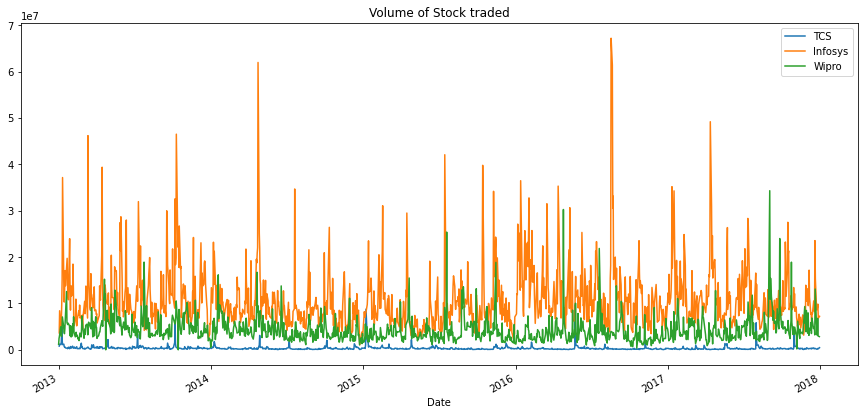

In [ ]:
tcs['Volume'].plot(label = 'TCS', figsize = (15,7))
infy['Volume'].plot(label = "Infosys")
wipro['Volume'].plot(label = 'Wipro')
plt.title('Volume of Stock traded')
plt.legend()

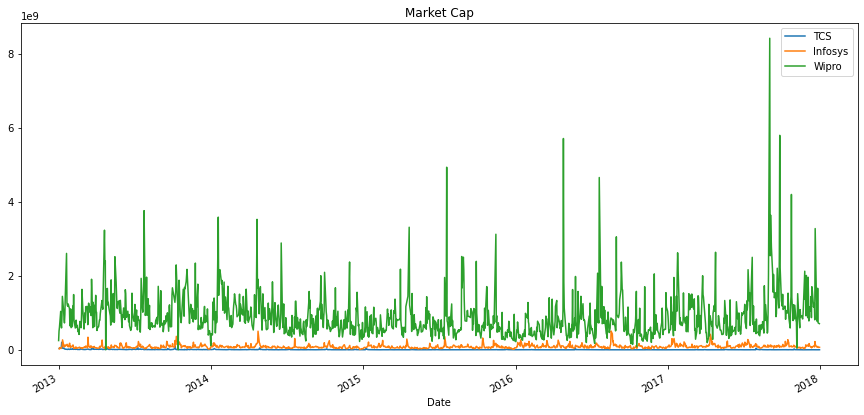

In [ ]:
#Market Capitalisation
tcs['MarktCap'] = tcs['Open'] * tcs['Volume']
infy['MarktCap'] = infy['Open'] * infy['Volume']
wipro['MarktCap'] = wipro['Open'] * wipro['Volume']
tcs['MarktCap'].plot(label = 'TCS', figsize = (15,7))
infy['MarktCap'].plot(label = 'Infosys')
wipro['MarktCap'].plot(label = 'Wipro')
plt.title('Market Cap')
plt.legend()

<AxesSubplot:xlabel='Date'>

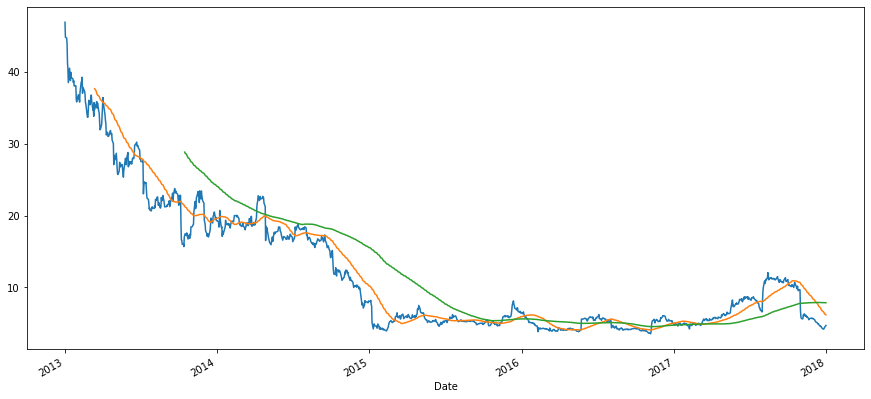

In [ ]:
tcs['MA50'] = tcs['Open'].rolling(50).mean()
tcs['MA200'] = tcs['Open'].rolling(200).mean()
tcs['Open'].plot(figsize = (15,7))
tcs['MA50'].plot()
tcs['MA200'].plot()

array([[<AxesSubplot:xlabel='TCSOpen', ylabel='TCSOpen'>,
        <AxesSubplot:xlabel='InfosysOpen', ylabel='TCSOpen'>,
        <AxesSubplot:xlabel='WiproOpen', ylabel='TCSOpen'>],
       [<AxesSubplot:xlabel='TCSOpen', ylabel='InfosysOpen'>,
        <AxesSubplot:xlabel='InfosysOpen', ylabel='InfosysOpen'>,
        <AxesSubplot:xlabel='WiproOpen', ylabel='InfosysOpen'>],
       [<AxesSubplot:xlabel='TCSOpen', ylabel='WiproOpen'>,
        <AxesSubplot:xlabel='InfosysOpen', ylabel='WiproOpen'>,
        <AxesSubplot:xlabel='WiproOpen', ylabel='WiproOpen'>]],
      dtype=object)

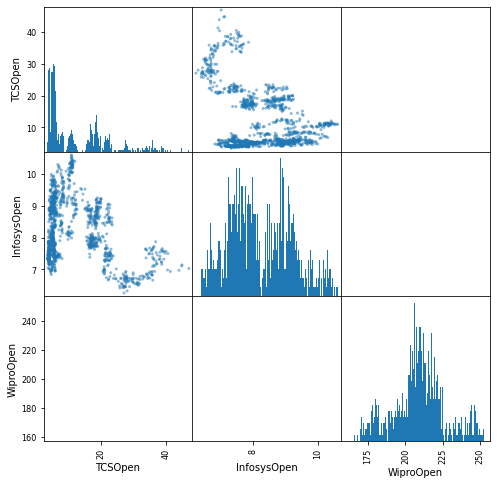

In [ ]:
data = pd.concat([tcs['Open'],infy['Open'],wipro['Open']],axis = 1)
data.columns = ['TCSOpen','InfosysOpen','WiproOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})

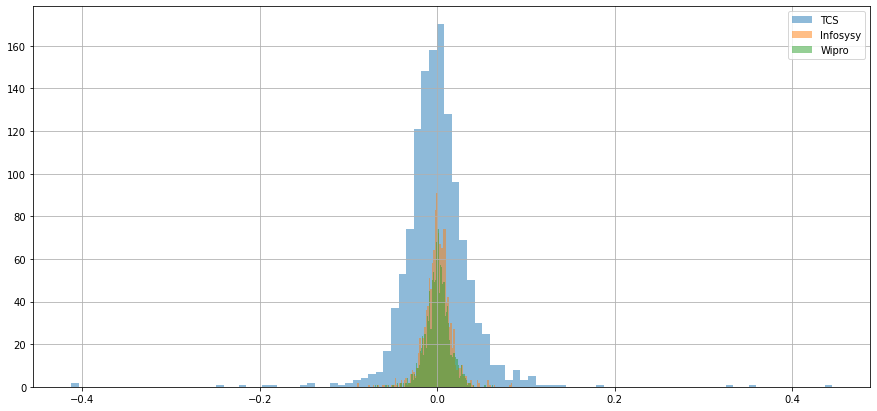

In [ ]:
#Volatility
tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1
infy['returns'] = (infy['Close']/infy['Close'].shift(1))-1
wipro['returns'] = (wipro['Close']/wipro['Close'].shift(1)) - 1
tcs['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (15,7))
infy['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
wipro['returns'].hist(bins = 100, label = 'Wipro', alpha = 0.5)
plt.legend()